In [1]:
# Academic Risk Analysis 
#this project studies academic risk factors using interpretable data analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/Ashwini/OneDrive/Desktop/Academic -Risk-Analysis/data/student-mat.csv")

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
# Defining Academic Risk
# Academic risk is defined using final grade,failures and absences

In [15]:
df["academic_risk"]=((df["G3"]<10)|(df["failures"]>=2)|(df["absences"]>15)).astype(int)
df["academic_risk"].value_counts()

academic_risk
0    240
1    155
Name: count, dtype: int64

In [17]:
corr_data=df[["G1","G2","G3","failures","absences"]].corr()
corr_data

,G1,G2,G3,failures,absences
G1,1.000000,0.852118,0.801468,-0.354718,-0.031003
G2,0.852118,1.000000,0.904868,-0.355896,-0.031777
G3,0.801468,0.904868,1.000000,-0.360415,0.034247
failures,-0.354718,-0.355896,-0.360415,1.000000,0.063726
absences,-0.031003,-0.031777,0.034247,0.063726,1.000000


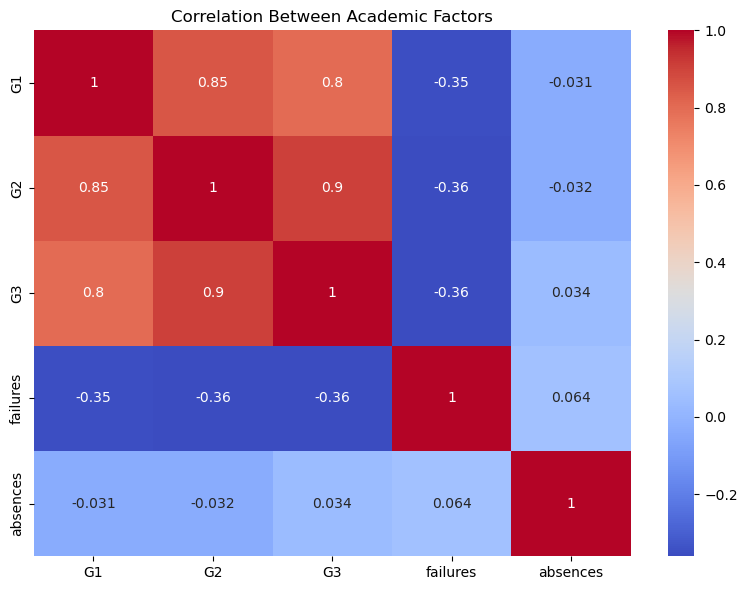

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_data,annot=True,cmap="coolwarm")
plt.title("Correlation Between Academic Factors")
plt.tight_layout()
plt.savefig("C:/Users/Ashwini/OneDrive/Desktop/Academic -Risk-Analysis/visuals/Correlation_heatmap.png", dpi=300)
plt.show()

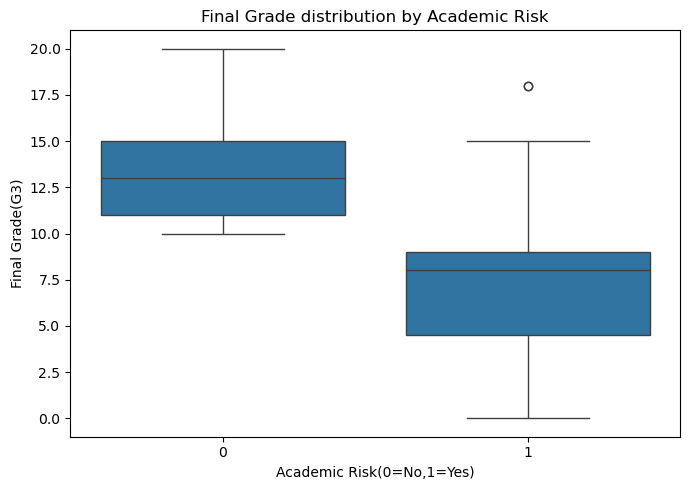

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(x="academic_risk",y="G3",data=df)
plt.xlabel("Academic Risk(0=No,1=Yes)")
plt.ylabel("Final Grade(G3)")
plt.title("Final Grade distribution by Academic Risk")
plt.tight_layout()
plt.savefig("C:/Users/Ashwini/OneDrive/Desktop/Academic -Risk-Analysis/visuals/grade_vs_risk_boxplot.png", dpi=300)
plt.show()

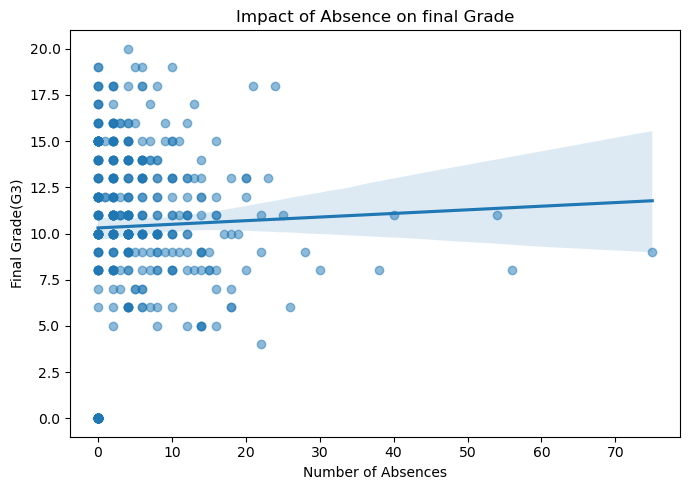

In [31]:
plt.figure(figsize=(7,5))
sns.regplot(x="absences",y="G3",data=df,scatter_kws={"alpha":0.5})
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade(G3)")
plt.title("Impact of Absence on final Grade")
plt.tight_layout()
plt.savefig("C:/Users/Ashwini/OneDrive/Desktop/Academic -Risk-Analysis/visuals/absences_vs_grade.png",dpi=300)
plt.show()